# Kepler Exoplanet Dataset — Data Overview

## Objective
This notebook provides an initial overview of the Kepler Exoplanet Search Results dataset.
The goal is to:
- Load the raw dataset
- Inspect its structure and contents
- Understand key columns and target variables
- Identify missing values and class distributions


## Section 1 - Load dataset and libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# Path to the raw dataset
DATA_PATH = "../data/raw/cumulative.csv"  # change to .xlsx if needed

# Load dataset
df = pd.read_csv(DATA_PATH)

# Display first 5 rows
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## Section 2 - Dataset shape and structure inspection

Why this matters:
- Identifies numerical vs categorical features
- Highlights missing values
- Helps plan preprocessing later

In [4]:
# Number of rows and columns
print("Dataset Shape:", df.shape)

Dataset Shape: (9564, 50)


In [5]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [6]:
# List all column names
df.columns.tolist()

['rowid',
 'kepid',
 'kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_pdisposition',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_teq_err1',
 'koi_teq_err2',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_tce_delivname',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [7]:
# Quick statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rowid,9564.0,4.782500e+03,2.761033e+03,1.000000e+00,2.391750e+03,4.782500e+03,7.173250e+03,9.564000e+03
kepid,9564.0,7.690628e+06,2.653459e+06,7.574500e+05,5.556034e+06,7.906892e+06,9.873066e+06,1.293514e+07
koi_score,8054.0,4.808294e-01,4.769285e-01,0.000000e+00,0.000000e+00,3.340000e-01,9.980000e-01,1.000000e+00
koi_fpflag_nt,9564.0,1.882058e-01,3.908968e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_ss,9564.0,2.315977e-01,4.218753e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_co,9564.0,1.948975e-01,3.961425e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_fpflag_ec,9564.0,1.200335e-01,3.250176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
koi_period,9564.0,7.567136e+01,1.334744e+03,2.418425e-01,2.733684e+00,9.752831e+00,4.071518e+01,1.299958e+05
koi_period_err1,9110.0,2.147864e-03,8.236369e-03,0.000000e+00,5.345750e-06,3.520500e-05,2.762000e-04,1.725000e-01
koi_period_err2,9110.0,-2.147864e-03,8.236369e-03,-1.725000e-01,-2.762000e-04,-3.520500e-05,-5.345750e-06,0.000000e+00


## Section 3 - Target variable

The target variable is koi_disposition. This variable needs to be checked and analyzed.

In [8]:
# Distribution of target classes
df["koi_disposition"].value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

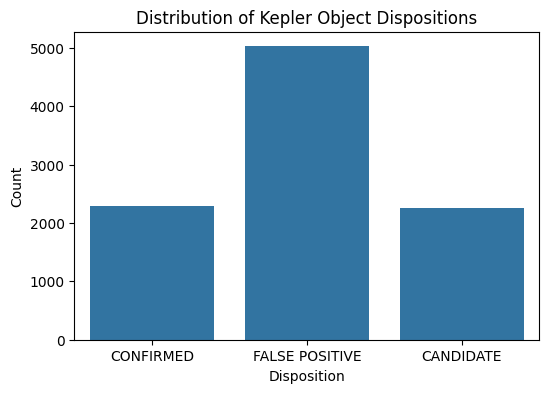

In [9]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="koi_disposition")
plt.title("Distribution of Kepler Object Dispositions")
plt.xlabel("Disposition")
plt.ylabel("Count")
plt.show()

## Graph Interpretation

### Class Distribution Plot
The disposition distribution shows that FALSE POSITIVE cases significantly outnumber CONFIRMED and CANDIDATE objects. This reflects the real operational challenge faced by exoplanet surveys, where most detected signals are not genuine planets. From a machine learning perspective, this confirms the presence of class imbalance and motivates the use of precision–recall–focused evaluation rather than accuracy alone.

## Section 5 - Kepler vs Pipeline dispositions

This section will reveal:
- Reveals disagreement between human-reviewed and automated decisions
- Motivates ML-based decision support

In [10]:
# Compare literature vs pipeline dispositions
comparison = pd.crosstab(
    df["koi_disposition"],
    df["koi_pdisposition"]
)

comparison

koi_pdisposition,CANDIDATE,FALSE POSITIVE
koi_disposition,,
CANDIDATE,2248,0
CONFIRMED,2248,45
FALSE POSITIVE,0,5023


In [ ]:
## Section 6 - Missing values overview

In [11]:
# Count missing values per column
missing_values = df.isnull().sum()

# Show columns with missing values only
missing_values[missing_values > 0].sort_values(ascending=False)

koi_teq_err1         9564
koi_teq_err2         9564
kepler_name          7270
koi_score            1510
koi_steff_err2        483
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad_err2         468
koi_steff_err1        468
koi_srad_err1         468
koi_period_err2       454
koi_period_err1       454
koi_depth_err1        454
koi_depth_err2        454
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_duration_err2     454
koi_duration_err1     454
koi_impact_err1       454
koi_impact_err2       454
koi_prad_err2         363
koi_teq               363
koi_prad              363
koi_prad_err1         363
koi_impact            363
koi_depth             363
koi_steff             363
koi_model_snr         363
koi_srad              363
koi_slogg             363
koi_tce_delivname     346
koi_tce_plnt_num      346
koi_insol_err1        321
koi_insol             321
koi_insol_err2        321
koi_kepmag              1
dtype: int64

In [12]:
# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

koi_teq_err1         100.000000
koi_teq_err2         100.000000
kepler_name           76.014220
koi_score             15.788373
koi_steff_err2         5.050188
koi_slogg_err1         4.893350
koi_slogg_err2         4.893350
koi_srad_err2          4.893350
koi_steff_err1         4.893350
koi_srad_err1          4.893350
koi_period_err2        4.746968
koi_period_err1        4.746968
koi_depth_err1         4.746968
koi_depth_err2         4.746968
koi_time0bk_err1       4.746968
koi_time0bk_err2       4.746968
koi_duration_err2      4.746968
koi_duration_err1      4.746968
koi_impact_err1        4.746968
koi_impact_err2        4.746968
koi_prad_err2          3.795483
koi_teq                3.795483
koi_prad               3.795483
koi_prad_err1          3.795483
koi_impact             3.795483
koi_depth              3.795483
koi_steff              3.795483
koi_model_snr          3.795483
koi_srad               3.795483
koi_slogg              3.795483
koi_tce_delivname      3.617733
koi_tce_

## Section 6 - Analysis using some kye numeric features

In [13]:
# Select some key numerical features
example_features = [
    "koi_period",
    "koi_duration",
    "koi_depth",
    "koi_prad",
    "koi_teq"
]

# Filter to available columns
example_features = [col for col in example_features if col in df.columns]

df[example_features].describe()

,koi_period,koi_duration,koi_depth,koi_prad,koi_teq
count,9564.000000,9564.000000,9.201000e+03,9201.000000,9201.000000
mean,75.671358,5.621606,2.379134e+04,102.891778,1085.385828
std,1334.744046,6.471554,8.224268e+04,3077.639126,856.351161
min,0.241843,0.052000,0.000000e+00,0.080000,25.000000
25%,2.733684,2.437750,1.599000e+02,1.400000,539.000000
50%,9.752831,3.792600,4.211000e+02,2.390000,878.000000
75%,40.715178,6.276500,1.473400e+03,14.930000,1379.000000
max,129995.778400,138.540000,1.541400e+06,200346.000000,14667.000000


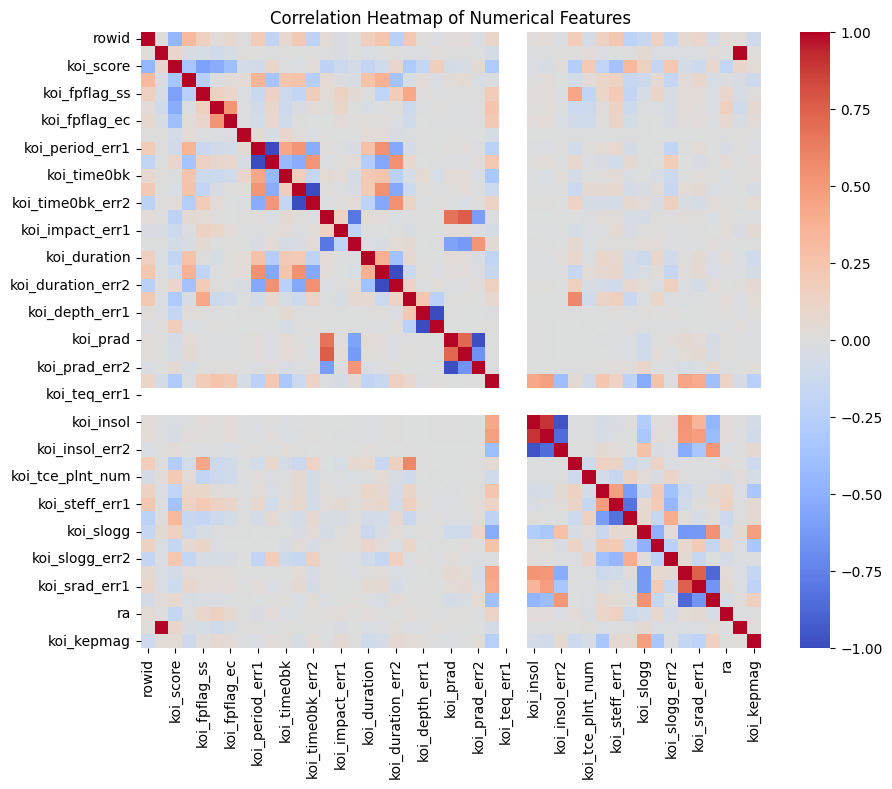

In [14]:
# Select numerical columns only
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap (limited size for readability)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Graph Interpretation

### Correlation Heatmap
The correlation heatmap highlights strong correlations between physical measurements and their corresponding uncertainty terms (e.g., planetary radius and radius errors), which is expected due to their shared estimation process. Stellar parameters also exhibit internal correlations, while most transit signal features remain only weakly correlated with each other. This indicates that the dataset contains both redundant and independent information, making feature selection and dimensionality control important in later stages.

## Section 7 - Conclusion

This exploratory analysis confirms that the Kepler Exoplanet dataset is well-suited for supervised machine learning.

The target variable (`koi_disposition`) shows a clear class imbalance, with FALSE POSITIVE cases forming the majority. This highlights the need for stratified sampling and appropriate evaluation metrics in later modeling stages.

Correlation analysis reveals strong dependencies between core astrophysical measurements and their associated uncertainty terms, indicating redundancy that must be handled carefully during feature engineering. At the same time, many numerical features show low pairwise correlation, suggesting complementary information content rather than excessive multicollinearity.

Overall, the dataset combines physically meaningful planetary signals, stellar host properties, and pipeline-derived indicators, providing a strong foundation for classification and explainable modeling in subsequent notebooks.